# Exporting Sample Data
Exporting Sample Data for **Part 1: Reading and Writing Files in Python** and **Part 3: Plotting and Data Visualization in Python**. Note: this is not the analysis notebook.

Author: Mark Bauer

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from openpyxl import Workbook
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import os
import seaborn as sns
from io import BytesIO
import zipfile
from zipfile import ZipFile

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

Documention for installing watermark: https://github.com/rasbt/watermark

In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,geopandas,matplotlib,json,requests,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy     : 1.23.1
pandas    : 1.4.3
geopandas : 0.11.1
matplotlib: 3.5.2
json      : 2.0.9
requests  : 2.28.1
sodapy    : 2.1.1



# Building Footprints dataset

In [3]:
# reading in data as a dataframe
url = 'https://data.cityofnewyork.us/api/views/qb5r-6dgf/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

rows, columns = df.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

# printing the first five rows
df.head()

This dataset has 1,083,339 rows and 16 columns.


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.96664570466969 40.62599676...,NaN,3170958,1925.0,08/22/2017 12:00:00 AM,Constructed,96807,29.749853,2100,40.0,0,0,3065220021,3065220021,Photogramm,{31298F86-3088-4F53-B3DB-71A9EFA6FA1F}
1,MULTIPOLYGON (((-74.16790202462265 40.63936048...,NaN,5028452,1965.0,08/22/2017 12:00:00 AM,Constructed,326368,22.630000,2100,39.0,0,0,5012640036,5012640036,Photogramm,{F5F8CDA5-69E2-46F8-8F69-BA95C025B520}
2,MULTIPOLYGON (((-74.19510813278613 40.55610681...,NaN,5078368,1970.0,08/22/2017 12:00:00 AM,Constructed,746627,35.760000,2100,51.0,0,0,5060190091,5060190091,Photogramm,{9F644794-F72C-4582-9E5E-B337E2B97068}
3,MULTIPOLYGON (((-73.96113466505085 40.57743931...,NaN,3245111,1928.0,08/22/2017 12:00:00 AM,Constructed,786626,37.500000,2100,6.0,0,0,3086910048,3086910048,Photogramm,{F916B22D-E25B-44AE-9FA9-2A51191B9CDF}
4,MULTIPOLYGON (((-73.75421559146166 40.75591276...,NaN,4161096,1950.0,08/22/2017 12:00:00 AM,Constructed,746409,18.015113,2100,93.0,0,0,4075020005,4075020005,Photogramm,{525F2C24-616B-4F29-98A3-8FEA5D4B1A7D}


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083339 entries, 0 to 1083338
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1083339 non-null  object 
 1   NAME        2254 non-null     object 
 2   BIN         1083339 non-null  int64  
 3   CNSTRCT_YR  1072979 non-null  float64
 4   LSTMODDATE  1083339 non-null  object 
 5   LSTSTATYPE  1083016 non-null  object 
 6   DOITT_ID    1083339 non-null  int64  
 7   HEIGHTROOF  1080692 non-null  float64
 8   FEAT_CODE   1083339 non-null  int64  
 9   GROUNDELEV  1082774 non-null  float64
 10  SHAPE_AREA  1083339 non-null  int64  
 11  SHAPE_LEN   1083339 non-null  int64  
 12  BASE_BBL    1083339 non-null  int64  
 13  MPLUTO_BBL  1083339 non-null  int64  
 14  GEOMSOURCE  1083020 non-null  object 
 15  GLOBALID    1083339 non-null  object 
dtypes: float64(3), int64(7), object(6)
memory usage: 132.2+ MB


### For simplicity, we're only exporting buildings built from 2010 to 2020

In [5]:
# saving only buildings built between 2010 and 2020 as a new dataframe
df_sample = (
    df
    .loc[df['CNSTRCT_YR'].between(2010, 2020)]
    .reset_index(drop=True)
)

rows, columns = df_sample.shape
print('This dataset has {:,} rows and {:,} columns.'.format(rows, columns))

# previewing first five rows of sample data
df_sample.head()

This dataset has 16,308 rows and 16 columns.


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,SHAPE_AREA,SHAPE_LEN,BASE_BBL,MPLUTO_BBL,GEOMSOURCE,GLOBALID
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011.0,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100,15.0,0,0,3044520924,3044520924,Other (Man,{C045C815-79DB-4644-AD9D-C34AC03D1AB4}
1,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010.0,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100,37.0,0,0,4018780115,4018780115,Other (Man,{FDF673E7-FF92-4A7A-AF6D-C49D77343C47}
2,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010.0,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100,112.0,0,0,4030600139,4030600139,Photogramm,{788E5D72-46C1-443F-8BC9-6B97F329BFED}
3,MULTIPOLYGON (((-73.81520745135124 40.73053646...,NaN,4545453,2012.0,08/22/2017 12:00:00 AM,Constructed,1118502,16.640000,2100,74.0,0,0,4066560052,4066560052,Photogramm,{789A5A51-5B12-46DC-AE85-B06820A3225E}
4,MULTIPOLYGON (((-73.84769179857282 40.87911947...,NaN,2118998,2012.0,08/22/2017 12:00:00 AM,Constructed,1254551,33.000000,2100,154.0,0,0,2047220003,2047220003,Other (Man,{BB58FD7B-CC22-4896-901D-F8BAFF4AC129}


In [6]:
# sanity checks - value counts descending
df_sample['CNSTRCT_YR'].value_counts()

2018.0    2350
2017.0    1962
2016.0    1866
2020.0    1595
2011.0    1491
2012.0    1460
2010.0    1371
2019.0    1331
2015.0    1090
2013.0     918
2014.0     874
Name: CNSTRCT_YR, dtype: int64

In [7]:
# sanity checks - value counts index sorting
df_sample['CNSTRCT_YR'].value_counts().sort_index()

2010.0    1371
2011.0    1491
2012.0    1460
2013.0     918
2014.0     874
2015.0    1090
2016.0    1866
2017.0    1962
2018.0    2350
2019.0    1331
2020.0    1595
Name: CNSTRCT_YR, dtype: int64

In [8]:
# list items in data folder
%ls ../data/

README.md


# Write out sample data

In [9]:
# writing files as a CSV
df_sample.to_csv('../data/sample-data.csv', index=False)

# writing files as JSON
df_sample.to_json('../data/sample-data.json')

# writing files as an Excel file
df_sample.to_excel('../data/sample-data.xlsx', index=False)

# sanity check - listing items in data folder
%ls ../data/

README.md         sample-data.csv   sample-data.json  sample-data.xlsx


## Convert a DataFrame to a GeoDataFrame

<AxesSubplot:>

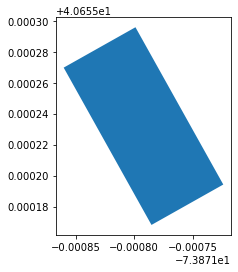

In [10]:
# convert dataframe with geom column to a geodataframe
geometry = gpd.GeoSeries.from_wkt(df_sample['the_geom'])

gdf_sample = gpd.GeoDataFrame(
    df_sample,
    geometry=geometry,
    crs="EPSG:4326"
)

# sanity check - preview geometry
gdf_sample.head(1).plot()

# Writing out spatial data

In [11]:
#export shapefile data in shapefile directory
!mkdir ../data/shapefile/

!ls ../data/

README.md        sample-data.json shapefile
sample-data.csv  sample-data.xlsx


In [12]:
# shapefile
gdf_sample.to_file('../data/shapefile/sample-data.shp', index=False)

# GeoJSON
gdf_sample.to_file('../data/sample-data.geojson', driver='GeoJSON', index=False)

# GeoPackage
gdf_sample.to_file('../data/sample-data.gpkg', layer='buildings', driver='GPKG', index=False)

# listing items in data folder
%ls ../data/

README.md            sample-data.gpkg     shapefile/
sample-data.csv      sample-data.json
sample-data.geojson  sample-data.xlsx


In [13]:
# sanity check shapefile
%ls ../data/shapefile/

sample-data.cpg  sample-data.prj  sample-data.shx
sample-data.dbf  sample-data.shp


## Creating a ZIP file with our sample data

In [14]:
file_path = '../data/sample-buildings.zip'

# create a zipfile
with zipfile.ZipFile(file_path, 'w') as file:
        # write mode overrides all the existing files in the 'ZIP.'
        # you have to create the file which you have to write to the 'ZIP.'
        file.write('../data/sample-data.csv', basename('../data/sample-data.csv'))
        
# seeing if a file is a zipfile
print('is ZIP: {}'.format(zipfile.is_zipfile(file_path)))

# save items in our zipfile
items = zipfile.ZipFile(file_path)

# available files in the container
print('list files in ZIP: {}'.format(items.namelist()))

is ZIP: True
list files in ZIP: ['sample-data.csv']


In [15]:
# sanity check = sample-buildings.zip is created
%ls ../data/

README.md             sample-data.geojson   sample-data.xlsx
sample-buildings.zip  sample-data.gpkg      shapefile/
sample-data.csv       sample-data.json


# Merge with PLUTO dataset

In [16]:
# assigning the PLUTO dataset link as 'url'
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

# reading in our zipfile data in-memory
content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

# printing files in our zipfile
for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [17]:
# read our csv data into a dataframe from our zipfile
pluto_data = pd.read_csv(
    zf.open('pluto_20v1.csv'),
    low_memory=False
)

# shape of data
rows, columns = pluto_data.shape
print('rows: {:,}, columns: {}'.format(rows, columns))

# previewing the first five rows of our pluto data 
pluto_data.head()

rows: 859,172, columns: 99


,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom,dcpedited,notes
0,BK,834,46,307.0,106.0,2001.0,20.0,38.0,11220.0,L114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
1,QN,4042,106,407.0,929.0,3000.0,25.0,19.0,11356.0,E297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000007...,NaN,NaN
2,BK,4679,17,317.0,866.0,3002.0,18.0,41.0,11203.0,L174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000006...,NaN,NaN
3,BK,7831,6,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN
4,BK,7831,7,318.0,676.0,1002.0,22.0,46.0,11234.0,L159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0106000020E61000000100000001030000000100000005...,NaN,NaN


In [18]:
# printing the column names and their non-null count and data types 
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 99 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  sanitboro             857270 non-null  float64
 13  sanitsub              857150 non-null  object 
 14  address               858772 non-null  object 
 15  

In [19]:
# saving only the columns we want in our dataframe

cols = [
    'bbl', 'zipcode', 'bldgclass', 'landuse',  
    'borough', 'xcoord', 'ycoord', 
    'latitude', 'longitude', 'firm07_flag', 'pfirm15_flag'
]

pluto_data = pluto_data.loc[:, cols]

pluto_data.head()

,bbl,zipcode,bldgclass,landuse,borough,xcoord,ycoord,latitude,longitude,firm07_flag,pfirm15_flag
0,3008340046,11220.0,S9,4.0,BK,982211.0,171707.0,40.637972,-74.007347,NaN,NaN
1,4040420106,11356.0,A1,1.0,QN,1026895.0,225880.0,40.786562,-73.846003,NaN,NaN
2,3046790017,11203.0,B1,1.0,BK,1004527.0,177269.0,40.653216,-73.926923,NaN,NaN
3,3078310006,11234.0,A9,1.0,BK,1004804.0,166580.0,40.623876,-73.925958,NaN,NaN
4,3078310007,11234.0,A9,1.0,BK,1004784.0,166579.0,40.623874,-73.926030,NaN,NaN


In [20]:
# merging the pluto data with the building footprints data and saving as a new dataframe

df_merged = df_sample.merge(
    pluto_data, 
    left_on='MPLUTO_BBL', 
    right_on='bbl'
)

df_merged = df_merged.reset_index(drop=True)

rows, columns = df_merged.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

df_merged.head()

rows: 15,651
columns: 28


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,...,zipcode,bldgclass,landuse,borough,xcoord,ycoord,latitude,longitude,firm07_flag,pfirm15_flag
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011.0,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100,15.0,...,11239.0,A5,1.0,BK,1019842.0,178007.0,40.655193,-73.871725,NaN,NaN
1,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394833,2011.0,12/07/2018 12:00:00 AM,Constructed,1250462,26.000000,2100,15.0,...,11239.0,A5,1.0,BK,1019842.0,178007.0,40.655193,-73.871725,NaN,NaN
2,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010.0,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100,37.0,...,11368.0,S2,4.0,QN,1021273.0,209767.0,40.742361,-73.866393,NaN,NaN
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010.0,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100,112.0,...,11379.0,B1,1.0,QN,1018081.0,199706.0,40.714759,-73.877963,NaN,NaN
4,MULTIPOLYGON (((-73.87803271958461 40.71468859...,NaN,4608920,2010.0,08/17/2017 12:00:00 AM,Constructed,1266801,11.414818,5110,111.0,...,11379.0,B1,1.0,QN,1018081.0,199706.0,40.714759,-73.877963,NaN,NaN


In [21]:
# printing the column names and their non-null count and data types 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   the_geom      15651 non-null  object  
 1   NAME          76 non-null     object  
 2   BIN           15651 non-null  int64   
 3   CNSTRCT_YR    15651 non-null  float64 
 4   LSTMODDATE    15651 non-null  object  
 5   LSTSTATYPE    15549 non-null  object  
 6   DOITT_ID      15651 non-null  int64   
 7   HEIGHTROOF    14092 non-null  float64 
 8   FEAT_CODE     15651 non-null  int64   
 9   GROUNDELEV    15399 non-null  float64 
 10  SHAPE_AREA    15651 non-null  int64   
 11  SHAPE_LEN     15651 non-null  int64   
 12  BASE_BBL      15651 non-null  int64   
 13  MPLUTO_BBL    15651 non-null  int64   
 14  GEOMSOURCE    15601 non-null  object  
 15  GLOBALID      15651 non-null  object  
 16  geometry      15651 non-null  geometry
 17  bbl           15651 non-null  int64   
 18  zipcod

In [22]:
# filling null values with '0' in Flood Insurance Rate Map fields
df_merged['pfirm15_flag'] = df_merged['pfirm15_flag'].fillna(value=0).astype(int)
df_merged['firm07_flag'] = df_merged['firm07_flag'].fillna(value=0).astype(int)

# correct CNSTRCT_YR type to int
df_merged['CNSTRCT_YR'] = df_merged['CNSTRCT_YR'].astype(int)

# fill NA landuse type with mean
df_merged['landuse'] = df_merged['landuse'].fillna(df_merged['landuse'].mode().values[0]).astype(int)
                               
# printing number of rows in data    
print('number of rows in new datframe: {:,}'.format(df_merged.shape[0]))
df_merged.head()

number of rows in new datframe: 15,651


,the_geom,NAME,BIN,CNSTRCT_YR,LSTMODDATE,LSTSTATYPE,DOITT_ID,HEIGHTROOF,FEAT_CODE,GROUNDELEV,...,zipcode,bldgclass,landuse,borough,xcoord,ycoord,latitude,longitude,firm07_flag,pfirm15_flag
0,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394834,2011,08/22/2017 12:00:00 AM,Constructed,1250314,26.000000,2100,15.0,...,11239.0,A5,1,BK,1019842.0,178007.0,40.655193,-73.871725,0,0
1,MULTIPOLYGON (((-73.87172426474349 40.65519420...,NaN,3394833,2011,12/07/2018 12:00:00 AM,Constructed,1250462,26.000000,2100,15.0,...,11239.0,A5,1,BK,1019842.0,178007.0,40.655193,-73.871725,0,0
2,MULTIPOLYGON (((-73.86650099829305 40.74236058...,NaN,4540159,2010,08/22/2017 12:00:00 AM,Constructed,201366,28.000000,2100,37.0,...,11368.0,S2,4,QN,1021273.0,209767.0,40.742361,-73.866393,0,0
3,MULTIPOLYGON (((-73.87805078807256 40.71475698...,NaN,4540051,2010,08/22/2017 12:00:00 AM,Constructed,1171655,28.330225,2100,112.0,...,11379.0,B1,1,QN,1018081.0,199706.0,40.714759,-73.877963,0,0
4,MULTIPOLYGON (((-73.87803271958461 40.71468859...,NaN,4608920,2010,08/17/2017 12:00:00 AM,Constructed,1266801,11.414818,5110,111.0,...,11379.0,B1,1,QN,1018081.0,199706.0,40.714759,-73.877963,0,0


# Writing out Part 3 data

In [23]:
df_merged.to_csv('../data/building-footprints-pluto.csv', index=False)

In [24]:
%ls ../data

README.md                      sample-data.gpkg
building-footprints-pluto.csv  sample-data.json
sample-buildings.zip           sample-data.xlsx
sample-data.csv                shapefile/
sample-data.geojson
